In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
data = pd.concat([pd.read_csv(os.path.join('metrics', file)) for file in sorted(os.listdir('metrics'))])

random = pd.DataFrame(
    zip(np.arange(16, 1024), 1008 * [1/16], 1008 * ['random']),
    columns=['position', 'accuracy', 'model_name']
)

data = pd.concat([data, random])

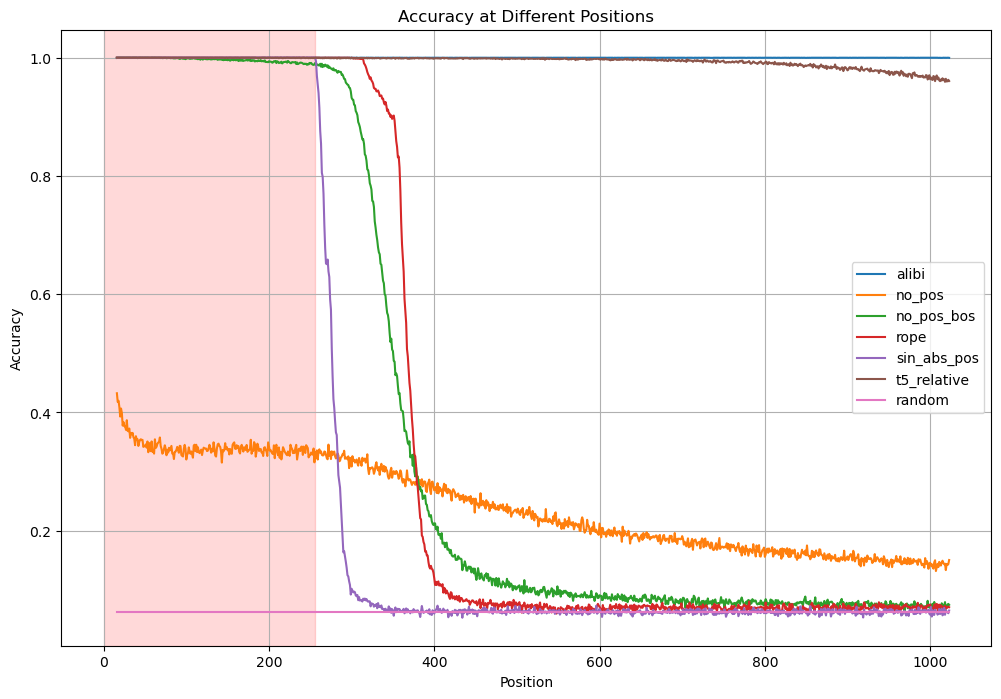

In [3]:
model_names = data.model_name.unique().tolist()

plt.figure(figsize=(12, 8))
for model_name in model_names:
    to_plot = data[data.model_name == model_name]
    plt.plot(to_plot.position.values, to_plot.accuracy.values, label=model_name)
plt.legend()
plt.title('Accuracy at Different Positions')
plt.axvspan(0, 256, alpha=0.15, color='red')
plt.xlabel('Position')
plt.ylabel('Accuracy')
plt.grid()